In [15]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

mnist = fetch_openml('mnist_784', version=1)


X = mnist.data
y = mnist.target.astype(np.uint8)  

In [16]:
subset_size = 1000  
indices = np.random.choice(len(X), subset_size, replace=False)
X_subset = X.iloc[indices]
y_subset = y.iloc[indices]

In [17]:
# Scale the features to zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(np.float64))

In [18]:
# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=1/7, random_state=42
)

In [19]:
# Step 4: Initialize the SVM classifier
svm_clf = LinearSVC(max_iter=20000, random_state=42)

In [20]:
# Step 5: Train the classifier
svm_clf.fit(X_train, y_train)



c:\Users\Jean\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Jean\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=20000, random_state=42)

In [21]:
# Step 6: Make predictions on the test set
y_pred = svm_clf.predict(X_test)


In [22]:

# Step 7: Evaluate the classifier
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Overall Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       983
           1       0.93      0.98      0.95      1152
           2       0.90      0.89      0.90       967
           3       0.88      0.88      0.88      1034
           4       0.90      0.93      0.92       906
           5       0.87      0.86      0.87       937
           6       0.94      0.94      0.94       961
           7       0.93      0.93      0.93      1055
           8       0.89      0.82      0.85       969
           9       0.89      0.88      0.89      1036

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Confusion Matrix:
 [[ 951    0    5    0    1    5   10    3    7    1]
 [   0 1126    4    3    1    6    1    2    8    1]
 [   7   16  864   12   12    8   14   10   20    4]
 [   4    9   31  910    1   27    7   

### Visualisation

KeyError: 2

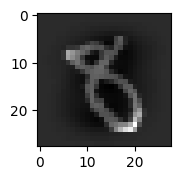

In [23]:
import matplotlib.pyplot as plt

# Find indices of misclassified samples
misclassified_indices = np.where(y_test != y_pred)[0]

# Plot some misclassified samples
plt.figure(figsize=(10, 4))
for i, index in enumerate(misclassified_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[index]}\nPred: {y_pred[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# Grid Search

In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time
import warnings
warnings.filterwarnings('ignore') 

In [43]:
mnist = fetch_openml('mnist_784', version=1)

X = mnist.data
y = mnist.target.astype(np.uint8) 

subset_size = 10000 
indices = np.random.choice(len(X), subset_size, replace=False)
X = X.iloc[indices]
y = y.iloc[indices]

# Scale the features to zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(np.float64))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [45]:
param_grid_linear = {
    'C': [0.1, 1, 10,100]
}

param_grid_poly = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'coef0': [0, 1],
    'kernel': ['poly']
}

param_grid_rbf = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['rbf']
}


### Linear kernel

In [46]:
print("Starting Grid Search for Linear Kernel...")
grid_search_linear = GridSearchCV(
    estimator=SVC(kernel='linear'),
    param_grid=param_grid_linear,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

start_time = time.time()
grid_search_linear.fit(X_train, y_train)
end_time = time.time()

print(f"Linear Kernel Grid Search took {end_time - start_time:.2f} seconds.")
print("Best Parameters for Linear Kernel:", grid_search_linear.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search_linear.best_score_:.4f}\n")


Starting Grid Search for Linear Kernel...
Linear Kernel Grid Search took 44.56 seconds.
Best Parameters for Linear Kernel: {'C': 0.1}
Best Cross-Validation Accuracy: 0.9108



### Polynomial Kernel

In [47]:
print("Starting Grid Search for Polynomial Kernel...")
grid_search_poly = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid_poly,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

start_time = time.time()
grid_search_poly.fit(X_train, y_train)
end_time = time.time()

print(f"Polynomial Kernel Grid Search took {end_time - start_time:.2f} seconds.")
print("Best Parameters for Polynomial Kernel:", grid_search_poly.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search_poly.best_score_:.4f}\n")


Starting Grid Search for Polynomial Kernel...
Polynomial Kernel Grid Search took 627.97 seconds.
Best Parameters for Polynomial Kernel: {'C': 10, 'coef0': 1, 'degree': 4, 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.9479



### RBF Kernel

In [48]:
print("Starting Grid Search for RBF Kernel...")
grid_search_rbf = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid_rbf,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

start_time = time.time()
grid_search_rbf.fit(X_train, y_train)
end_time = time.time()

print(f"RBF Kernel Grid Search took {end_time - start_time:.2f} seconds.")
print("Best Parameters for RBF Kernel:", grid_search_rbf.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search_rbf.best_score_:.4f}\n")


Starting Grid Search for RBF Kernel...
RBF Kernel Grid Search took 490.18 seconds.
Best Parameters for RBF Kernel: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9358



### Evaluate best model on test set

In [49]:
# Initialize a dictionary to store evaluation metrics
kernel_results = {}

# Linear Kernel Evaluation
best_linear_clf = grid_search_linear.best_estimator_
y_pred_linear = best_linear_clf.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
report_linear = classification_report(y_test, y_pred_linear, output_dict=True)
kernel_results['linear'] = {
    'accuracy': accuracy_linear,
    'report': report_linear,
    'confusion_matrix': confusion_matrix(y_test, y_pred_linear)
}

# Polynomial Kernel Evaluation
best_poly_clf = grid_search_poly.best_estimator_
y_pred_poly = best_poly_clf.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
report_poly = classification_report(y_test, y_pred_poly, output_dict=True)
kernel_results['poly'] = {
    'accuracy': accuracy_poly,
    'report': report_poly,
    'confusion_matrix': confusion_matrix(y_test, y_pred_poly)
}

# RBF Kernel Evaluation
best_rbf_clf = grid_search_rbf.best_estimator_
y_pred_rbf = best_rbf_clf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
report_rbf = classification_report(y_test, y_pred_rbf, output_dict=True)
kernel_results['rbf'] = {
    'accuracy': accuracy_rbf,
    'report': report_rbf,
    'confusion_matrix': confusion_matrix(y_test, y_pred_rbf)
}


### compare perfomance of different kernel

In [50]:
print("Test Set Accuracy for Different Kernels:")
for kernel in kernel_results:
    print(f"{kernel.capitalize()} Kernel Accuracy: {kernel_results[kernel]['accuracy']:.4f}")


Test Set Accuracy for Different Kernels:
Linear Kernel Accuracy: 0.9100
Poly Kernel Accuracy: 0.9565
Rbf Kernel Accuracy: 0.9470


In [51]:
for kernel in kernel_results:
    print(f"\nClassification Report for {kernel.capitalize()} Kernel:")
    print(classification_report(y_test, globals()[f'y_pred_{kernel}']))



Classification Report for Linear Kernel:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       215
           1       0.93      0.99      0.96       212
           2       0.90      0.90      0.90       209
           3       0.86      0.88      0.87       208
           4       0.87      0.92      0.89       184
           5       0.92      0.89      0.90       179
           6       0.95      0.95      0.95       207
           7       0.90      0.91      0.91       201
           8       0.90      0.83      0.87       200
           9       0.89      0.83      0.86       185

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000


Classification Report for Poly Kernel:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       215
           1       0.95      1.00      0.97       

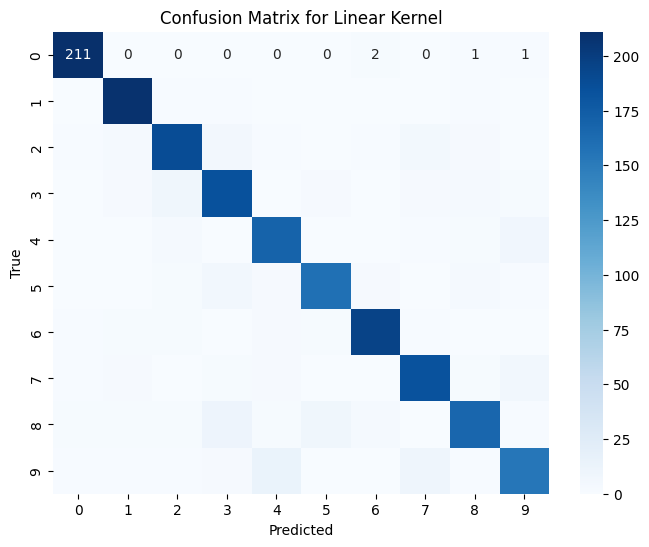

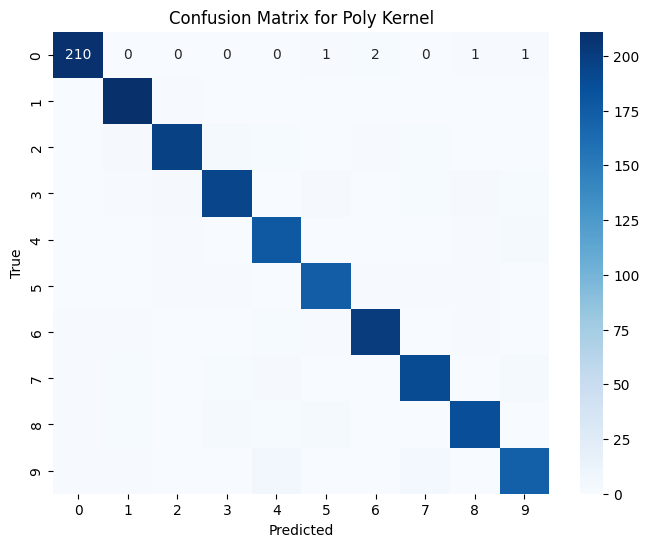

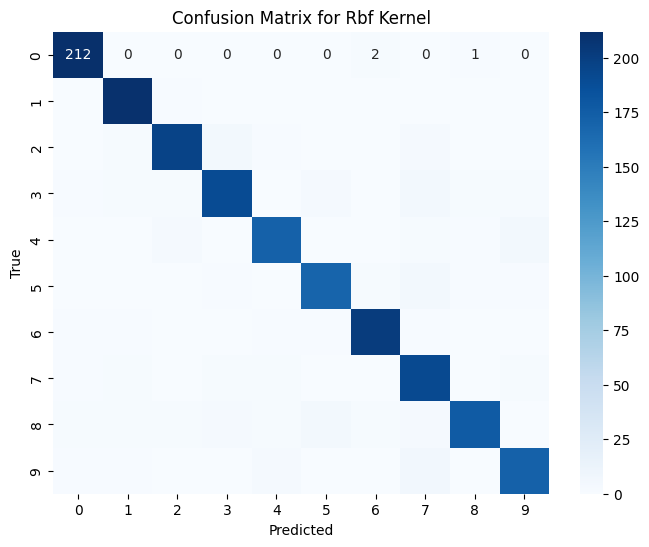

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

for kernel in kernel_results:
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        kernel_results[kernel]['confusion_matrix'],
        annot=True, fmt='d', cmap='Blues',
        xticklabels=np.unique(y), yticklabels=np.unique(y)
    )
    plt.title(f"Confusion Matrix for {kernel.capitalize()} Kernel")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


### best model


In [53]:
# Find the kernel with the highest accuracy
best_kernel = max(kernel_results, key=lambda k: kernel_results[k]['accuracy'])
print(f"\nThe best kernel is: {best_kernel.capitalize()} Kernel with accuracy {kernel_results[best_kernel]['accuracy']:.4f}")



The best kernel is: Poly Kernel with accuracy 0.9565
